# Selective-stock-headlines-sentiment

In [2]:
#import librarry
import nltk
from nltk.corpus import stopwords
import string
import re
import pandas as pd
import numpy as np
from nltk import FreqDist
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to C:\Users\Bhuwan Chandra
[nltk_data]     Bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Bhuwan Chandra
[nltk_data]     Bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Bhuwan Chandra
[nltk_data]     Bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Bhuwan Chandra
[nltk_data]     Bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Sentence tokenization
from nltk.tokenize import sent_tokenize

In [13]:
#word tokenization
from nltk.tokenize import word_tokenize

In [3]:
# Importing data set
df=pd.read_csv('Project6500.csv', encoding= 'unicode_escape')

In [5]:
# dataset summary
df.head()

,datetime,headline,ticker,sentiment
0,01/16/2020 05:25 AM,$MMM fell on hard times but could be set to re...,MMM,0
1,01/11/2020 06:43,Wolfe Research Upgrades 3M $MMM to ¡§Peer Perf...,MMM,1
2,01/09/2020 09:37,3M $MMM Upgraded to ¡§Peer Perform¡¨ by Wolfe ...,MMM,1
3,01/08/2020 17:01,$MMM #insideday follow up as it also opened up...,MMM,1
4,01/08/2020 07:44,$MMM is best #dividend #stock out there and do...,MMM,0


# Test Preprocessing

In [6]:
# Save the Ticker Category for the cleaning of tweets and then drop the coloumn
df["ticker"] = df["ticker"].str.lower()
ticker_category = df.ticker.unique()
ticker_category = np.append(ticker_category ,['3m'], axis=0)
print(ticker_category)
df.drop(['datetime','ticker'],axis =1 , inplace=True )

['mmm' 'axp' 'aapl' 'ba' 'cat' 'cvx' 'csco' 'ko' 'dis' 'dow' 'xom' 'gs'
 'hd' 'ibm' 'intc' 'jnj' 'jpm' 'mcd' 'mrk' 'msft' 'nke' 'pfe' 'pg' 'trv'
 'utx' 'unh' 'vz' 'v' 'wba' 'wmt' '3m']


In [7]:
# Dataset summary after removal of extra coloumns
df.head()

,headline,sentiment
0,$MMM fell on hard times but could be set to re...,0
1,Wolfe Research Upgrades 3M $MMM to ¡§Peer Perf...,1
2,3M $MMM Upgraded to ¡§Peer Perform¡¨ by Wolfe ...,1
3,$MMM #insideday follow up as it also opened up...,1
4,$MMM is best #dividend #stock out there and do...,0


In [4]:
# Convert the text to lower case
df["headline"]=df["headline"].str.lower()


In [9]:
len(df['headline'])

9470

In [13]:
# Word tokenization
for i in range(len(df['headline'])):
    df['headline'][i]=word_tokenize(df['headline'][i])
    

C:\ProgramData\Anaconda3\envs\bhuwan\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Tweets After word tokenization
df.head()

,headline,sentiment
0,"[$, mmm, fell, on, hard, times, but, could, be...",0
1,"[wolfe, research, upgrades, 3m, $, mmm, to, ¡§...",1
2,"[3m, $, mmm, upgraded, to, ¡§peer, perform¡¨, ...",1
3,"[$, mmm, #, insideday, follow, up, as, it, als...",1
4,"[$, mmm, is, best, #, dividend, #, stock, out,...",0


In [15]:
#Remove punctuations, special characters and stopwords from the text column 
df['tweets'] = [list() for x in range(len(df.index))]
#Remove punctuations  
for row_i in range(len(df['headline'])): #for i in range(len(df['headline'])):  #for i in range(3):
    
    for word_i in range(len(df['headline'][row_i])):        
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('.','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace(',','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('¡¦','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('§','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('¥','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('¡K','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('¡','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace("'",'')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('$','a')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace(':','')
        df['headline'][row_i][word_i] = df['headline'][row_i][word_i].replace('`','')
        df['tweets'][row_i].append(df['headline'][row_i][word_i])
    
    #Removing Punctuations    
    for word_j in range(len(df['headline'][row_i])):
        try:
            #print('word : ' +str(word_j) +'\n\t\t' +  str(df['headline'][row_i][word_j]))
            if df['headline'][row_i][word_j] in string.punctuation:
                df['tweets'][row_i].remove(df['headline'][row_i][word_j])
                # print('punct')
        except:
            pass
        
    #Removing Stopwords        
    for word_j in range(len(df['headline'][row_i])):
        try:
            #print('word : ' +str(word_j) +'\n\t\t' +  str(df['headline'][row_i][word_j]))
            if df['headline'][row_i][word_j] in stop_words:
                df['tweets'][row_i].remove(df['headline'][row_i][word_j])
                # print('stopword')
                #print(df['headline'][row_i])
        except:
            pass   
     
    #Remving Numeric character
    for word_j in range(len(df['headline'][row_i])):
        try:
            #print('word : ' +str(word_j) +'\n\t\t' +  str(df['headline'][row_i][word_j]))
            if df['headline'][row_i][word_j].isnumeric() :
                df['tweets'][row_i].remove(df['headline'][row_i][word_j])
                # print('numeric')
        except:
            pass  
     
    #Remving ticker catgetory word
    for word_j in range(len(df['headline'][row_i])):
        try:
            #print('word : ' +str(word_j) +'\n\t\t' +  str(df['headline'][row_i][word_j]))
            if df['headline'][row_i][word_j] in ticker_category :
                df['tweets'][row_i].remove(df['headline'][row_i][word_j])
                # print('ticker ')
                
        except:
            pass
    
    # Removing Empty words ''
    for word_j in range(len(df['headline'][row_i])):
        try:
            #print('word : ' +str(word_j) +'\n\t\t' +  str(df['headline'][row_i][word_j]))
            if df['headline'][row_i][word_j] =='':
                df['tweets'][row_i].remove(df['headline'][row_i][word_j])
                #print(row_i)
               
                
        except:
            pass


In [16]:
# Tweets after removal of punctuations
df.head()

,headline,sentiment,tweets
0,"[a, mmm, fell, on, hard, times, but, could, be...",0,"[fell, hard, times, could, set, rebound, soon]"
1,"[wolfe, research, upgrades, 3m, a, mmm, to, pe...",1,"[wolfe, research, upgrades, peer, perform¨]"
2,"[3m, a, mmm, upgraded, to, peer, perform¨, by,...",1,"[upgraded, peer, perform¨, wolfe, research, st..."
3,"[a, mmm, #, insideday, follow, up, as, it, als...",1,"[insideday, follow, also, opened, nice, candle..."
4,"[a, mmm, is, best, #, dividend, #, stock, out,...",0,"[best, dividend, stock, xli, go, go, please]"


In [17]:
#Updating Ticker category word
ticker_category = np.insert(ticker_category , 0 ,['jpmorgan','mcdonalds','mcdonald',
                                              'microsoft' , 'nike' , 'apple' , 'chase'] )      
ticker_category=ticker_category[ticker_category!='v']
ticker_category=ticker_category[ticker_category!='dow']
ticker_category=ticker_category[ticker_category!='ba']
ticker_category=ticker_category[ticker_category!='cat']
ticker_category=ticker_category[ticker_category!='dis']
ticker_category=ticker_category[ticker_category!='hd']
ticker_category=ticker_category[ticker_category!='gs']
ticker_category=ticker_category[ticker_category!='unh']
ticker_category=ticker_category[ticker_category!='pg']
ticker_category=ticker_category[ticker_category!='ko']

In [18]:
# Removing ticker category words
for row_i in range(len(df['headline'])): #for i in range(len(df['headline'])):  #for i in range(3): 
    for word_i in range(len(df['tweets'][row_i])):  
        for ticker in ticker_category:
            # tmp = df['tweets'][row_i][word_i]
            df['tweets'][row_i][word_i] = df['tweets'][row_i][word_i].replace(ticker , '') #df['tweets'][row_i][word_i]
            # if tmp != new:
            #     print(str(row_i) +': '+ tmp + '--->' + new +'--->'+ ticker )

In [20]:
# Lemmatization with Pos Tag
df['tweets_lemm'] = [list() for x in range(len(df.index))]
# Lemmatization
for row_i in range(len(df['tweets'])):
    while('' in df['tweets'][row_i]):
        df['tweets'][row_i].remove('')

    for token , tag in nltk.pos_tag(df['tweets'][row_i]):
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        
        lemmatizer = nltk.WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        df['tweets_lemm'][row_i].append(token)
        
       # print(token)
    #print(str(row_i) +'_____________')

In [21]:
df['tweets_w_meaning'] = [list() for x in range(len(df.index))]
for row_i in range(len(df['tweets'])):
    for word_i in range(len(df['tweets_lemm'][row_i])):
        if  any(wordnet.synsets(df['tweets_lemm'][row_i][word_i])):
            df['tweets_w_meaning'][row_i].append(df['tweets_lemm'][row_i][word_i])

In [23]:
# Create two objects X and y. X will be the 'Tweets' column dataframe and y will be the “Sentiment” column

df['tweets_join'] = [' '.join(list) for list in df.tweets_w_meaning]
X = df.tweets_join
y = df.sentiment

In [24]:
# Creating a CountVectorizer object
vectorizer = CountVectorizer()
A = vectorizer.fit_transform(X)
p = A.toarray()

In [25]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.3)

In [26]:
# Train a MultinomialNB model and Display the confusion Matrix 
clf = MultinomialNB()
model = clf.fit(X_train, y_train) 
                         

In [30]:
#Accuracy Score
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8936994016191482


[[1018  176]
 [ 126 1521]]


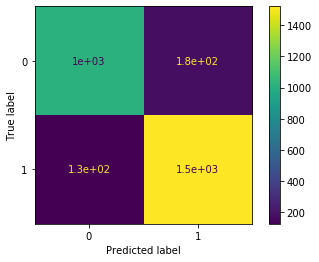

In [32]:
#Display the confusion Matrix
disp = plot_confusion_matrix(clf, X_test, y_test)
print(disp.confusion_matrix)   

# POS Tagging

In [26]:
#Display the POS tagging on the first 4 rows of ‘Tweets’  
for i in range(4): 
    word_token=word_tokenize(df['headline'][i]) 
    word = nltk.pos_tag(word_token)
    print(str(i+1) + ' Row')
    print(word)
    print("\n")
        

1 Row
[('$', '$'), ('mmm', 'NN'), ('fell', 'VBD'), ('on', 'IN'), ('hard', 'JJ'), ('times', 'NNS'), ('but', 'CC'), ('could', 'MD'), ('be', 'VB'), ('set', 'VBN'), ('to', 'TO'), ('rebound', 'VB'), ('soon', 'RB'), ('.', '.')]


2 Row
[('wolfe', 'JJ'), ('research', 'NN'), ('upgrades', 'VBZ'), ('3m', 'CD'), ('$', '$'), ('mmm', 'NN'), ('to', 'TO'), ('¡§peer', 'VB'), ('perform¡¨', 'NN')]


3 Row
[('3m', 'CD'), ('$', '$'), ('mmm', 'NN'), ('upgraded', 'VBN'), ('to', 'TO'), ('¡§peer', 'VB'), ('perform¡¨', 'NN'), ('by', 'IN'), ('wolfe', 'JJ'), ('research', 'NN'), ('#', '#'), ('stocks', 'NNS')]


4 Row
[('$', '$'), ('mmm', 'JJ'), ('#', '#'), ('insideday', 'NN'), ('follow', 'VB'), ('up', 'RP'), ('as', 'IN'), ('it', 'PRP'), ('also', 'RB'), ('opened', 'VBD'), ('up', 'RP'), ('with', 'IN'), ('a', 'DT'), ('nice', 'JJ'), ('candle', 'NN'), ('that', 'WDT'), ('closed', 'VBD'), ('just', 'RB'), ('over', 'IN'), ('the', 'DT'), ('prior', 'JJ'), ('day', 'NN'), ("'s", 'POS'), ('high', 'JJ'), ('and', 'CC'), ('th¡k',

# Dependency parser tree

“He appears to be the leading contender for being voted the new official Lord Commander of the Night's Watch.”

In [37]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [38]:
text = "He appears to be the leading contender for being voted the new official Lord Commander of the Night's Watch."

In [39]:
for token in nlp(text):
 print(token.text,'=>',token.dep_,'=>',token.head.text)

He => nsubj => appears
appears => ROOT => appears
to => aux => be
be => xcomp => appears
the => det => contender
leading => amod => contender
contender => attr => be
for => prep => contender
being => auxpass => voted
voted => pcomp => for
the => det => Commander
new => amod => official
official => amod => Commander
Lord => compound => Commander
Commander => oprd => voted
of => prep => Commander
the => det => Night
Night => poss => Watch
's => case => Night
Watch => pobj => of
. => punct => appears


In [36]:
from spacy import displacy
displacy.render(nlp(text),jupyter=True)